In [167]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [169]:
w = [0.18, 0.009, 0.18, 0.009, 0.18]

In [170]:
def generator_data(w ,):
   
    x1 = np.random.randint(1,25)
    x2 = np.random.randint(1,42)
    x3 = np.random.randint(1,12)
    x4 = np.random.randint(1,18)
    x5 = np.random.randint(1,23)
    y = w[0]*x1 + w[1]*x2 + w[2]*x3 + w[3]*x4 + w[4]*x5
    return [y, x1, x2, x3, x4, x5]

In [171]:
res = []
for i in range(1000):
    res.append(generator_data(w))

In [172]:
df = pd.DataFrame(res, columns= ['y', 'x1', 'x2', 'x3', 'x4', 'x5'])
df

,y,x1,x2,x3,x4,x5
0,4.230,6,29,10,1,6
1,7.569,11,38,11,3,18
2,5.589,22,17,7,4,1
3,5.886,15,33,6,1,10
4,6.255,14,21,6,14,13
...,...,...,...,...,...,...
995,3.132,1,33,6,15,8
996,5.571,17,10,2,9,11
997,4.194,9,36,9,10,3
998,6.300,13,6,4,14,17


In [173]:
df.describe()

,y,x1,x2,x3,x4,x5
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.639778,12.052000,21.297000,6.181000,8.845000,11.592000
std,1.742165,6.733992,12.035682,3.179363,4.865249,6.278611
min,1.143000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.407750,6.750000,11.000000,3.000000,5.000000,6.000000
50%,5.643000,12.000000,21.000000,6.000000,9.000000,12.000000
75%,6.912000,18.000000,32.000000,9.000000,13.000000,17.000000
max,10.296000,24.000000,41.000000,11.000000,17.000000,22.000000


In [174]:
df.y = df.y.round()

In [175]:
df

,y,x1,x2,x3,x4,x5
0,4.0,6,29,10,1,6
1,8.0,11,38,11,3,18
2,6.0,22,17,7,4,1
3,6.0,15,33,6,1,10
4,6.0,14,21,6,14,13
...,...,...,...,...,...,...
995,3.0,1,33,6,15,8
996,6.0,17,10,2,9,11
997,4.0,9,36,9,10,3
998,6.0,13,6,4,14,17


In [176]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse

In [177]:
y =df[["y"]]
x = df[["x1", "x2", "x3", "x4", "x5"]]
print(x.shape)
print(y.shape)

(1000, 5)
(1000, 1)


In [178]:
model=sm.OLS(y,x).fit()

In [179]:
model_summary=model.summary()

In [180]:
print(model_summary)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          8.502e+04
Date:                Wed, 08 Nov 2023   Prob (F-statistic):                        0.00
Time:                        22:03:48   Log-Likelihood:                         -164.81
No. Observations:                1000   AIC:                                      339.6
Df Residuals:                     995   BIC:                                      364.2
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [181]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 0)

In [182]:
lr = LinearRegression()

In [183]:
lr.fit(x_train, y_train)

LinearRegression()

In [184]:
pred =lr.predict(x_test)

In [185]:
r2 = r2_score(y_test, pred)
print(r2)
mse = mean_squared_error(y_test, pred)
print(mse)
mae = mean_absolute_error(y_test, pred)
print(mae)

0.9724635789327155
0.0898947393421513
0.25712563741491284


<Axes: >

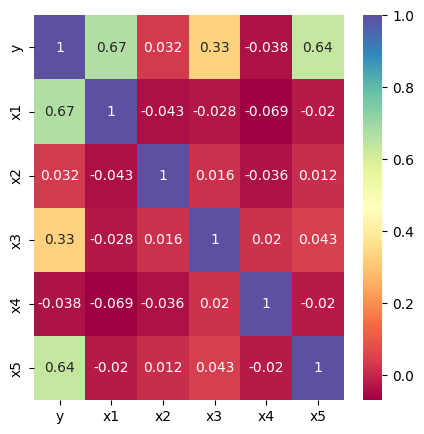

In [187]:
corr_matrix = df.corr()

#Матрица корреляции
plt.figure(figsize=(5,5))

sns.heatmap(corr_matrix,cmap='Spectral', annot = True)

In [195]:
result = {}
result['Linear_Regression'] = [mean_squared_error(y_test, pred), mean_absolute_error(y_test, pred), r2_score(y_test, pred)]
res_df = pd.DataFrame(result, index = ['MAE', 'RMSE', 'R2'])

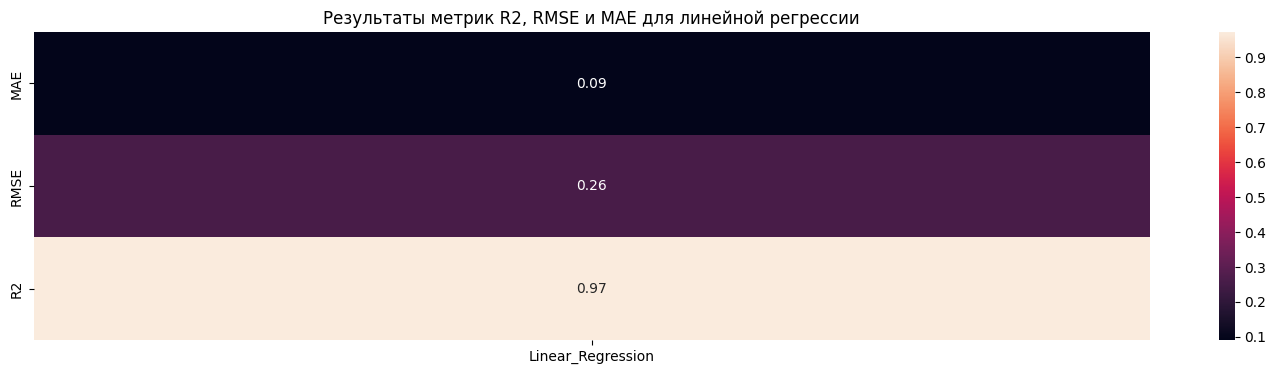

In [197]:
plt.figure(figsize=(18,4))
sns.heatmap(res_df, annot=True, fmt = '.2f')
plt.title('Результаты метрик R2, RMSE и MAE для линейной регрессии')
plt.show()

In [200]:
all_predictions = pd.DataFrame(y_test)
all_predictions['LinearRegression'] =  pred

In [201]:
all_predictions

,y,LinearRegression
993,7.0,6.921806
859,5.0,5.196987
298,7.0,7.045188
553,5.0,4.736283
672,7.0,6.553478
...,...,...
462,9.0,9.152069
356,7.0,7.015839
2,6.0,5.643207
478,6.0,5.942288
